# Least Square Method - Gradient Descent - Stochastic Gradient Descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Least Square Method

In [2]:
# Given data
x = np.array([0.5, 2.3, 2.9])  # weights
y = np.array([1.4, 1.9, 3.2])  # heights

Optimal weights: 0.6410256410256409, Optimal bias: 0.9487179487179498


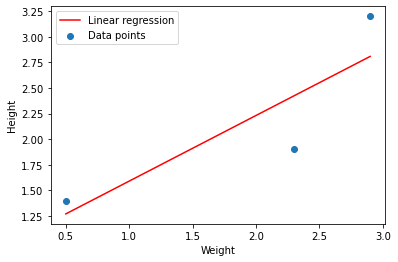

In [3]:
# Add a column of ones to x for the bias term
X = np.vstack([x, np.ones_like(x)]).T

# Use least squares to fit a linear model
m, c = np.linalg.lstsq(X, y, rcond=None)[0]

# Print the results
print(f"Optimal weights: {m}, Optimal bias: {c}")

# Plot the data and the linear regression line
plt.scatter(x, y, label='Data points')
plt.plot(x, m*x + c, color='red', label='Linear regression')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.legend()
plt.show()


# Using least square method to find the optimal value for slope and intercept (m and c)


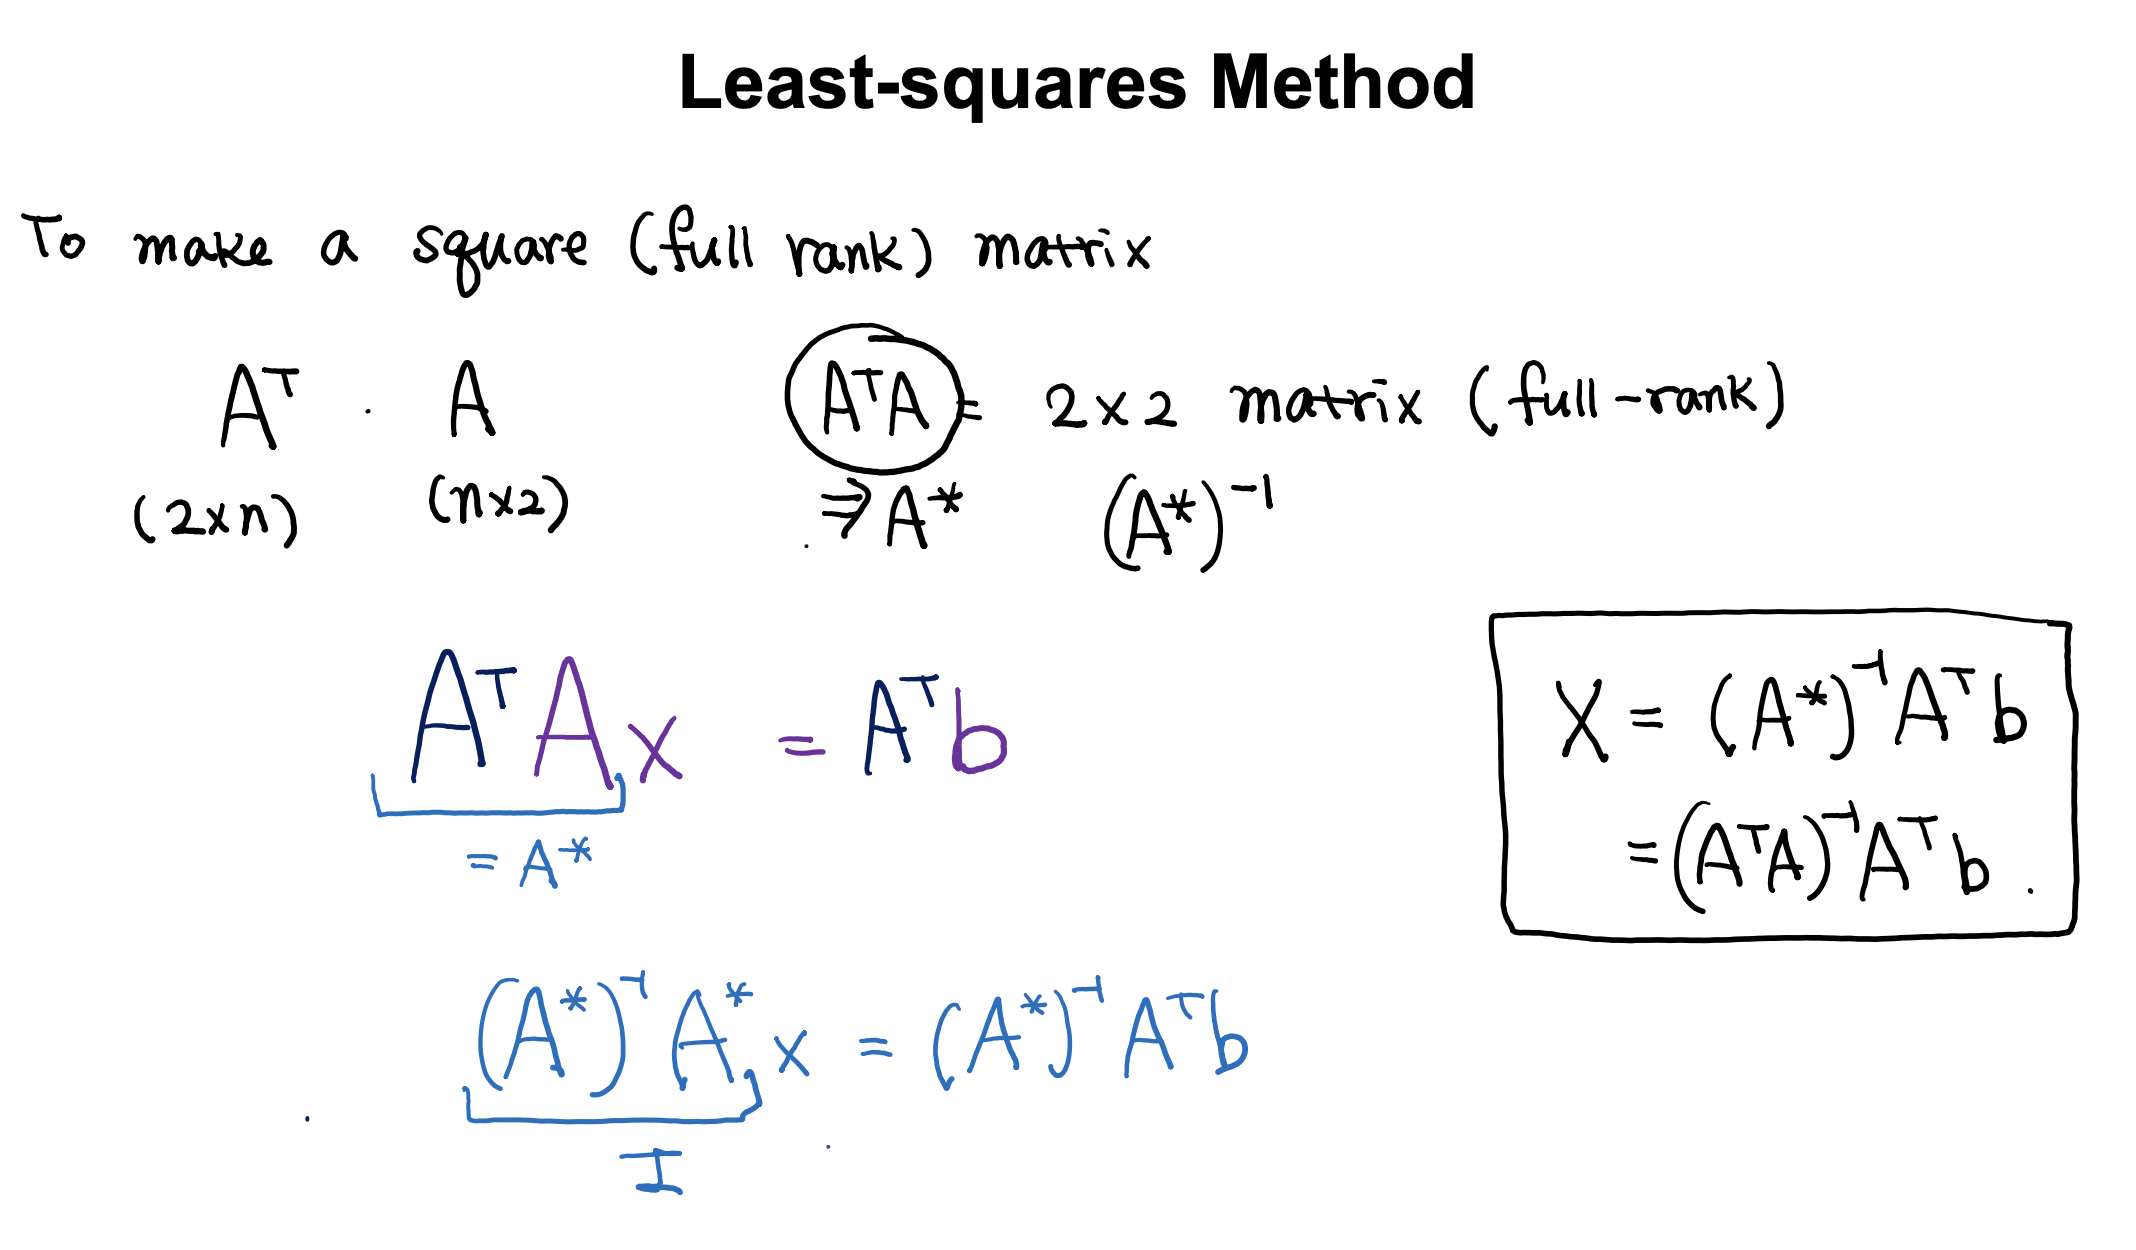

# Reasons for Choosing Gradient Descent over Least Squares:
Scalability: If the dataset is very large, computing the matrix operations involved in the least squares method can become computationally expensive, whereas gradient descent can be more scalable.
Non-linear Relationships: Gradient descent can be extended to handle non-linear relationships, making it more flexible for a broader range of machine learning models.

# Gradient Descent 

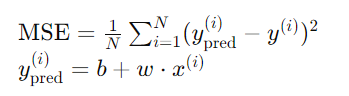

dw: Partial Derivative with Respect to Slope w

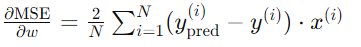

db: Partial Derivative with Respect to Intercept b

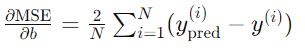

In [4]:
def sum_squared_error(y_true, y_pred):
    return np.sum((y_pred - y_true)**2)

def first_derivative_w(x, y, y_pred, N):
    derivative_w = 0
    for i in range(N):
        derivative_w += 2 * (y_pred[i] - y[i]) * x[i]
    return derivative_w

def first_derivative_b(y, y_pred, N):
    derivative_b = 0
    for i in range(N):
        derivative_b += 2 * (y_pred[i] - y[i])
    return derivative_b

def gradient_descent(x, y, slope, intercept, learning_rate, epochs):
    N = len(x)
    for epoch in range(epochs):
        
        # Calculate predictions
        y_pred =  intercept + slope * x 
        
        # Calculate gradients or first derivative
        dw = first_derivative_w(x, y, y_pred, N)
        db = first_derivative_b(y, y_pred, N)
        
        # next step
        slope = slope - learning_rate * dw
        intercept = intercept -learning_rate * db
                
        # Calculate and print the mean squared error for monitoring
        SSE = sum_squared_error(y, y_pred)
        print(f"Epoch {epoch + 1}/{epochs}, SSE: {SSE}")
    
    return slope, intercept

slope_initial = 1
intercept_initial = 0
learning_rate = 0.01
epochs = 1000

w_optimal, b_optimal = gradient_descent(x, y, slope_initial, intercept_initial, learning_rate, epochs)

print(f"Optimal weights: {w_optimal}, Optimal bias: {b_optimal}")

Epoch 1/1000, SSE: 1.0599999999999998
Epoch 2/1000, SSE: 1.0496800000000002
Epoch 3/1000, SSE: 1.0406028796639997
Epoch 4/1000, SSE: 1.032518788463303
Epoch 5/1000, SSE: 1.0252294081066624
Epoch 6/1000, SSE: 1.0185773136995073
Epoch 7/1000, SSE: 1.0124375313716336
Epoch 8/1000, SSE: 1.0067108388953847
Epoch 9/1000, SSE: 1.0013184494403968
Epoch 10/1000, SSE: 0.9961977929056283
Epoch 11/1000, SSE: 0.9912991682253307
Epoch 12/1000, SSE: 0.9865830868296288
Epoch 13/1000, SSE: 0.9820181645654992
Epoch 14/1000, SSE: 0.9775794488442404
Epoch 15/1000, SSE: 0.9732470911595686
Epoch 16/1000, SSE: 0.9690052936719072
Epoch 17/1000, SSE: 0.9648414732757914
Epoch 18/1000, SSE: 0.960745598249329
Epoch 19/1000, SSE: 0.9567096618548312
Epoch 20/1000, SSE: 0.9527272646159964
Epoch 21/1000, SSE: 0.9487932828345534
Epoch 22/1000, SSE: 0.9449036055415714
Epoch 23/1000, SSE: 0.9410549257545887
Epoch 24/1000, SSE: 0.9372445748287256
Epoch 25/1000, SSE: 0.9334703910047091
Epoch 26/1000, SSE: 0.92973061509360

# Steps for Gradient Descent

Main aim is to find the optimal slope and intercept that gives us the best fitting line considering all SSE of all elements in each step

y = mx + c

m = slope
c = intercept

Step 1: Find the gradient or  derivative of cost function - Sum of Squared Resudial/Error w.r.t each parameter i.e, w.r.t slope and intercept 

Step 2: Find the next step or next optimal value for slope and intercept

Srep 3: Repeat from step 1 until the step size (learning_rate * dw) |anew - aold|< e is very small or maximum number of iterations

# Reasons for Choosing Stochastic Gradient Descent over Gradient Descent:

Scalability: If the number of features is very large, computing the SSE will be a costly operation (230000 features , 1000000 samples = 230000000000 times) 

Stochastic Gradient Descent considers one sample randomly and calcu,ates Squared error instead of SSE which considers all the samples to decide next step.


# Stochastic Gradient Descent 

In [6]:
def sum_squared_error(y_true, y_pred):
    return np.sum((y_pred - y_true) ** 2)

def first_derivative_w(x, y, y_pred): 
    return 2 * (y_pred - y) * x

def first_derivative_b(y, y_pred):
    return 2 * (y_pred - y)

def gradient_descent(x, y, slope, intercept, learning_rate, epochs):
    N = len(x)
    for epoch in range(epochs):
        for i in range(N):
            # Select a random data point
            random_index = np.random.randint(N)
            x_i = x[random_index]
            y_i = y[random_index]

            # Calculate predictions
            y_pred = intercept + slope * x_i

            # Calculate gradients or first derivative
            dw = first_derivative_w(x_i, y_i, y_pred)
            db = first_derivative_b(y_i, y_pred)

            # Update step
            slope -= learning_rate * dw
            intercept -= learning_rate * db

        # Calculate and print the mean squared error for monitoring
        y_preds = intercept + slope * x  # Recompute predictions for all x
        SSE = sum_squared_error(y, y_preds)
        print(f"Epoch {epoch + 1}/{epochs}, SSE: {SSE}")

    return slope, intercept

slope_initial = 1
intercept_initial = 0
learning_rate = 0.01
epochs = 1000

w_optimal, b_optimal = gradient_descent(x, y, slope_initial, intercept_initial, learning_rate, epochs)

print(f"Optimal weights: {w_optimal}, Optimal bias: {b_optimal}")


Epoch 1/1000, SSE: 1.0355957892947885
Epoch 2/1000, SSE: 1.0481350456778846
Epoch 3/1000, SSE: 0.9999768962839491
Epoch 4/1000, SSE: 1.0162124363577871
Epoch 5/1000, SSE: 0.9783171702543791
Epoch 6/1000, SSE: 0.9530618729996271
Epoch 7/1000, SSE: 0.9732146409383318
Epoch 8/1000, SSE: 0.9332086583670508
Epoch 9/1000, SSE: 0.9150108832737978
Epoch 10/1000, SSE: 0.9109929708643077
Epoch 11/1000, SSE: 0.8964976528152733
Epoch 12/1000, SSE: 0.9140140260428247
Epoch 13/1000, SSE: 0.943449602805499
Epoch 14/1000, SSE: 0.9727223286968528
Epoch 15/1000, SSE: 0.9073276308312747
Epoch 16/1000, SSE: 0.8527885115536036
Epoch 17/1000, SSE: 0.8872168924677595
Epoch 18/1000, SSE: 0.8981015462309794
Epoch 19/1000, SSE: 0.7983083488946499
Epoch 20/1000, SSE: 0.7923097252505631
Epoch 21/1000, SSE: 0.8087395033982181
Epoch 22/1000, SSE: 0.9208430763394625
Epoch 23/1000, SSE: 0.8737003830280554
Epoch 24/1000, SSE: 0.772062556975789
Epoch 25/1000, SSE: 0.7638576684706377
Epoch 26/1000, SSE: 0.76496469759964

# Steps for Stochastic Gradient Descent

Main aim is to find the optimal slope and intercept that gives us the best fitting line considering one random sample in each step

Step 1: Select a random sample

Step 2: Find the gradient or  derivative of cost function - Squared Resudial/Error w.r.t each parameter i.e, w.r.t slope and intercept 

Step 3: Find the next step or next optimal value for slope and intercept

Srep 4: Repeat from step 1 until the step size (learning_rate * dw) |anew - aold|< e is very small or maximum number of iterations